# **Library and Dataset**

In [ ]:
!gdown 1fqHP-Sa_EpaFMoqWcaWUPFZI60mlZhVq

Downloading...
From: https://drive.google.com/uc?id=1fqHP-Sa_EpaFMoqWcaWUPFZI60mlZhVq
To: /content/autism.zip
100% 242M/242M [00:01<00:00, 132MB/s]


In [ ]:
!mkdir unzipped
!unzip autism.zip -d unzipped
!mkdir dataset
!mv unzipped/test dataset
!mv unzipped/train dataset
!mv unzipped/valid dataset

Archive:  autism.zip
  inflating: unzipped/autism.csv     
  inflating: unzipped/autism-2-(200 X 200)-90.50.h5  
  inflating: unzipped/test/autistic/001.jpg  
  inflating: unzipped/test/autistic/002.jpg  
  inflating: unzipped/test/autistic/003.jpg  
  inflating: unzipped/test/autistic/004.jpg  
  inflating: unzipped/test/autistic/005.jpg  
  inflating: unzipped/test/autistic/006.jpg  
  inflating: unzipped/test/autistic/007.jpg  
  inflating: unzipped/test/autistic/008.jpg  
  inflating: unzipped/test/autistic/009.jpg  
  inflating: unzipped/test/autistic/010.jpg  
  inflating: unzipped/test/autistic/011.jpg  
  inflating: unzipped/test/autistic/012.jpg  
  inflating: unzipped/test/autistic/013.jpg  
  inflating: unzipped/test/autistic/014.jpg  
  inflating: unzipped/test/autistic/015.jpg  
  inflating: unzipped/test/autistic/016.jpg  
  inflating: unzipped/test/autistic/017.jpg  
  inflating: unzipped/test/autistic/018.jpg  
  inflating: unzipped/test/autistic/019.jpg  
  inflating: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from tensorflow import keras
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Dataset autismn terbagi menjadi 3, train, validation, dan test dengan 2 class di masing-masing folder, yakni autistic dan non autistic.

In [ ]:
dataset_path = os.walk("./dataset")

paths = []
autistic = []

for path, subdir, files in dataset_path:
    if not files:
        continue

    # classnya
    classification = os.path.basename(os.path.normpath(path))
    classification = 1 if classification == "autistic" else 0

    # Tambain ke list
    paths += map(lambda x: os.path.join(path, x), files)
    autistic += [classification] * len(files)

print(f"Autistic: {autistic.count(1)} Non-Autistic: {autistic.count(0)}")

Autistic: 1463 Non-Autistic: 1463


# **Load Model**

**VGG16**

In [ ]:
base_model1 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model1.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

**Mobile Net**

In [ ]:
base_model2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model2.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

**Xception**

In [ ]:
base_model3 =tf.keras.applications.xception.Xception(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model3.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

**ResNet50**

In [ ]:
base_model4 =tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model4.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                      

**InceptionV3**

In [ ]:
base_model5 =tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model5.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, None, None, 32)       864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, None, None, 32)       96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activatio

In [ ]:
for layer in base_model1.layers:
    base_model1.trainable = False

for layer in base_model2.layers:
    base_model2.trainable = False

for layer in base_model3.layers:
    base_model3.trainable = False

for layer in base_model4.layers:
    base_model4.trainable = False

for layer in base_model5.layers:
    base_model5.trainable = False

Untuk tambahan layer akan disamakan sehingga dapat dibandingkan

# **Modelling**

**VGG16**

In [ ]:
inputs =  keras.Input(shape=(224, 224, 3))

x1 = base_model1(inputs, training=False)

# Pooling layer
pooling = keras.layers.GlobalAveragePooling2D()(x1)

#regularize
x1 = keras.layers.Dropout(0.2)(pooling)

x1 = keras.layers.Dense(256, activation='relu')(x1)
x1 = keras.layers.Dropout(0.2)(x1)
x1 = keras.layers.Dense(256, activation='relu')(x1)
x1 = keras.layers.Dropout(0.2)(x1)

# final dense layer
outputs = keras.layers.Dense(1,activation = 'sigmoid')(x1)

model1 = keras.Model(inputs, outputs)

**MobileNetV2**

In [ ]:

x2 = base_model2(inputs, training=False)


# Add pooling layer
pooling2 = keras.layers.GlobalAveragePooling2D()(x2)

#regularize
x2 = keras.layers.Dropout(0.2)(pooling2)

x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)

# Add final dense layer
outputs2 = keras.layers.Dense(1,activation = 'sigmoid')(x2)

# Combine inputs and outputs to create model
model2 = keras.Model(inputs, outputs2)

**Xception**

In [ ]:
x3 = base_model3(inputs, training=False)


# Add pooling layer
pooling3 = keras.layers.GlobalAveragePooling2D()(x3)

#regularize
x3 = keras.layers.Dropout(0.2)(pooling3)

x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dropout(0.2)(x3)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dropout(0.2)(x3)

# Add final dense layer
outputs3 = keras.layers.Dense(1,activation = 'sigmoid')(x3)

# Combine inputs and outputs to create model
model3 = keras.Model(inputs, outputs3)

**ResNet50**

In [ ]:
x4 = base_model4(inputs, training=False)


# Add pooling layer
pooling4 = keras.layers.GlobalAveragePooling2D()(x4)

#regularize
x4 = keras.layers.Dropout(0.2)(pooling4)

x4 = keras.layers.Dense(256, activation='relu')(x4)
x4 = keras.layers.Dropout(0.2)(x4)
x4 = keras.layers.Dense(256, activation='relu')(x4)
x4 = keras.layers.Dropout(0.2)(x4)

# Add final dense layer
outputs4 = keras.layers.Dense(1,activation = 'sigmoid')(x4)

# Combine inputs and outputs to create model
model4 = keras.Model(inputs, outputs4)

**InceptionV3**

In [ ]:
x5 = base_model5(inputs, training=False)


# Add pooling layer
pooling5 = keras.layers.GlobalAveragePooling2D()(x5)
#functional base / sequential base
#regularize
x5 = keras.layers.Dropout(0.2)(pooling5)

x5 = keras.layers.Dense(256, activation='relu')(x5)
x5 = keras.layers.Dropout(0.2)(x5)
x5 = keras.layers.Dense(256, activation='relu')(x5)
x5 = keras.layers.Dropout(0.2)(x5)

# Add final dense layer
outputs5 = keras.layers.Dense(1,activation = 'sigmoid')(x5)

# Combine inputs and outputs to create model
model5 = keras.Model(inputs, outputs5)

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba99dfc43d0>,vgg16,False
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba97ff5caf0>,global_average_pooling2d,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba955816320>,dropout,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954bd6200>,dense,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954d4e920>,dropout_1,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954d4f970>,dense_1,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954bd5720>,dropout_2,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba954bd5ff0>,dense_2,True


In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba97ff10730>,mobilenetv2_1.00_224,False
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba97ff745e0>,global_average_pooling2d_1,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba99eccb280>,dropout_3,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954beb640>,dense_3,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954bd7190>,dropout_4,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954a7dd20>,dense_4,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba99019a740>,dropout_5,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba954a7d900>,dense_5,True


In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba9559fba00>,xception,False
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954d4ca60>,global_average_pooling2d_2,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba97ff750f0>,dropout_6,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954a7d9f0>,dense_6,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954be9fc0>,dropout_7,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954b13a00>,dense_7,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954b13dc0>,dropout_8,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba954b10220>,dense_8,True


In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model4.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba95565f850>,resnet50,False
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954bea020>,global_average_pooling2d_3,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba955677340>,dropout_9,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954a20940>,dense_9,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954a20b50>,dropout_10,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954a23970>,dense_10,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7baa405572b0>,dropout_11,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba95423f100>,dense_11,True


In [ ]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model5.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba954d4e950>,inception_v3,False
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954bd6320>,global_average_pooling2d_4,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954d4caf0>,dropout_12,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba95423e6e0>,dense_12,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba95423e4a0>,dropout_13,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba9540ec0d0>,dense_13,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954bd7370>,dropout_14,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba94ff664a0>,dense_14,True


In [ ]:
train_datagen = ImageDataGenerator(
         rescale=1./255)
         #shear_range=0.2,
         #zoom_range=0.2,
         #horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
         '/content/dataset/train',
         target_size=(224, 224),
         batch_size=32,
         shuffle = False,
         class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
         '/content/dataset/valid',
         target_size=(224, 224),
         batch_size=32,
         shuffle = False,
         class_mode='binary')

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history1 = model1.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 31s 209ms/step - loss: 0.7241 - binary_accuracy: 0.4873 - accuracy: 0.4873 - val_loss: 0.7065 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 2/10
79/79 [==============================] - 11s 132ms/step - loss: 0.7072 - binary_accuracy: 0.5127 - accuracy: 0.5127 - val_loss: 0.6792 - val_binary_accuracy: 0.6200 - val_accuracy: 0.6200
Epoch 3/10
79/79 [==============================] - 11s 134ms/step - loss: 0.7057 - binary_accuracy: 0.5067 - accuracy: 0.5067 - val_loss: 0.6840 - val_binary_accuracy: 0.5200 - val_accuracy: 0.5200
Epoch 4/10
79/79 [==============================] - 11s 136ms/step - loss: 0.6928 - binary_accuracy: 0.5249 - accuracy: 0.5249 - val_loss: 0.6702 - val_binary_accuracy: 0.6200 - val_accuracy: 0.6200
Epoch 5/10
79/79 [==============================] - 11s 137ms/step - loss: 0.6899 - binary_accuracy: 0.5463 - accuracy: 0.5463 - val_loss: 0.6633 - val_binary_accuracy: 0.6450 - val_accuracy: 0.6450
Epoch

In [ ]:
history2 = model2.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)


Epoch 1/10
79/79 [==============================] - 13s 117ms/step - loss: 0.7445 - binary_accuracy: 0.5226 - accuracy: 0.5226 - val_loss: 0.6342 - val_binary_accuracy: 0.6400 - val_accuracy: 0.6400
Epoch 2/10
79/79 [==============================] - 7s 91ms/step - loss: 0.6300 - binary_accuracy: 0.6544 - accuracy: 0.6544 - val_loss: 0.5925 - val_binary_accuracy: 0.7200 - val_accuracy: 0.7200
Epoch 3/10
79/79 [==============================] - 7s 84ms/step - loss: 0.5954 - binary_accuracy: 0.6853 - accuracy: 0.6853 - val_loss: 0.5639 - val_binary_accuracy: 0.7150 - val_accuracy: 0.7150
Epoch 4/10
79/79 [==============================] - 7s 93ms/step - loss: 0.5811 - binary_accuracy: 0.7011 - accuracy: 0.7011 - val_loss: 0.6014 - val_binary_accuracy: 0.6200 - val_accuracy: 0.6200
Epoch 5/10
79/79 [==============================] - 7s 85ms/step - loss: 0.5772 - binary_accuracy: 0.6952 - accuracy: 0.6952 - val_loss: 0.5619 - val_binary_accuracy: 0.7400 - val_accuracy: 0.7400
Epoch 6/10
79

In [ ]:
history3 = model3.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 21s 192ms/step - loss: 0.6893 - binary_accuracy: 0.5606 - accuracy: 0.5606 - val_loss: 0.6400 - val_binary_accuracy: 0.6400 - val_accuracy: 0.6400
Epoch 2/10
79/79 [==============================] - 12s 155ms/step - loss: 0.6391 - binary_accuracy: 0.6425 - accuracy: 0.6425 - val_loss: 0.6079 - val_binary_accuracy: 0.6150 - val_accuracy: 0.6150
Epoch 3/10
79/79 [==============================] - 12s 152ms/step - loss: 0.5943 - binary_accuracy: 0.6892 - accuracy: 0.6892 - val_loss: 0.6307 - val_binary_accuracy: 0.6450 - val_accuracy: 0.6450
Epoch 4/10
79/79 [==============================] - 12s 154ms/step - loss: 0.5756 - binary_accuracy: 0.7094 - accuracy: 0.7094 - val_loss: 0.6033 - val_binary_accuracy: 0.6550 - val_accuracy: 0.6550
Epoch 5/10
79/79 [==============================] - 12s 151ms/step - loss: 0.5767 - binary_accuracy: 0.7023 - accuracy: 0.7023 - val_loss: 0.5848 - val_binary_accuracy: 0.7050 - val_accuracy: 0.7050
Epoch

In [ ]:
history4 = model4.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 18s 160ms/step - loss: 0.7514 - binary_accuracy: 0.4648 - accuracy: 0.4648 - val_loss: 0.6920 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 2/10
79/79 [==============================] - 10s 121ms/step - loss: 0.7383 - binary_accuracy: 0.4418 - accuracy: 0.4418 - val_loss: 0.6910 - val_binary_accuracy: 0.5850 - val_accuracy: 0.5850
Epoch 3/10
79/79 [==============================] - 10s 123ms/step - loss: 0.7149 - binary_accuracy: 0.4941 - accuracy: 0.4941 - val_loss: 0.7183 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 4/10
79/79 [==============================] - 10s 123ms/step - loss: 0.7060 - binary_accuracy: 0.5190 - accuracy: 0.5190 - val_loss: 0.6933 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 5/10
79/79 [==============================] - 10s 121ms/step - loss: 0.7091 - binary_accuracy: 0.5051 - accuracy: 0.5051 - val_loss: 0.6903 - val_binary_accuracy: 0.6050 - val_accuracy: 0.6050
Epoch

In [ ]:
history5 = model5.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 24s 206ms/step - loss: 0.7423 - binary_accuracy: 0.5016 - accuracy: 0.5016 - val_loss: 0.6794 - val_binary_accuracy: 0.5650 - val_accuracy: 0.5650
Epoch 2/10
79/79 [==============================] - 8s 102ms/step - loss: 0.6550 - binary_accuracy: 0.6065 - accuracy: 0.6065 - val_loss: 0.6226 - val_binary_accuracy: 0.6500 - val_accuracy: 0.6500
Epoch 3/10
79/79 [==============================] - 8s 100ms/step - loss: 0.6285 - binary_accuracy: 0.6576 - accuracy: 0.6576 - val_loss: 0.5954 - val_binary_accuracy: 0.7100 - val_accuracy: 0.7100
Epoch 4/10
79/79 [==============================] - 8s 103ms/step - loss: 0.6034 - binary_accuracy: 0.6686 - accuracy: 0.6686 - val_loss: 0.6095 - val_binary_accuracy: 0.6700 - val_accuracy: 0.6700
Epoch 5/10
79/79 [==============================] - 8s 99ms/step - loss: 0.5871 - binary_accuracy: 0.6821 - accuracy: 0.6821 - val_loss: 0.6262 - val_binary_accuracy: 0.6600 - val_accuracy: 0.6600
Epoch 6/10

In [ ]:
#model1.evaluate(validation_generator, steps=validation_generator.samples/validation_generator.batch_size)
#model2.evaluate(validation_generator, steps=validation_generator.samples/validation_generator.batch_size)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model1.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("VGG16")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 1s 123ms/step
VGG16
              precision    recall  f1-score   support

    autistic    0.91176   0.62000   0.73810       100
non_autistic    0.71212   0.94000   0.81034       100

    accuracy                        0.78000       200
   macro avg    0.81194   0.78000   0.77422       200
weighted avg    0.81194   0.78000   0.77422       200



In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model2.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("MobileNetV2")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 4s 157ms/step
MobileNetV2
              precision    recall  f1-score   support

    autistic    0.78899   0.86000   0.82297       100
non_autistic    0.84615   0.77000   0.80628       100

    accuracy                        0.81500       200
   macro avg    0.81757   0.81500   0.81462       200
weighted avg    0.81757   0.81500   0.81462       200



In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model3.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("Xception")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 4s 223ms/step
Xception
              precision    recall  f1-score   support

    autistic    0.84043   0.79000   0.81443       100
non_autistic    0.80189   0.85000   0.82524       100

    accuracy                        0.82000       200
   macro avg    0.82116   0.82000   0.81984       200
weighted avg    0.82116   0.82000   0.81984       200



In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model4.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("ResNet50")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 4s 152ms/step
ResNet50
              precision    recall  f1-score   support

    autistic    0.50000   1.00000   0.66667       100
non_autistic    0.00000   0.00000   0.00000       100

    accuracy                        0.50000       200
   macro avg    0.25000   0.50000   0.33333       200
weighted avg    0.25000   0.50000   0.33333       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model5.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("InceptionV3")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 4s 160ms/step
InceptionV3
              precision    recall  f1-score   support

    autistic    0.78378   0.87000   0.82464       100
non_autistic    0.85393   0.76000   0.80423       100

    accuracy                        0.81500       200
   macro avg    0.81886   0.81500   0.81444       200
weighted avg    0.81886   0.81500   0.81444       200



# **Fine tuning**

**untuk pretrained model VGG16, unfreeze block terakhir**

In [ ]:
for i, layer in enumerate(base_model1.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                             

In [ ]:
for layer in base_model1.layers:
    base_model1.trainable = True

In [ ]:
# fine tuning dari layer 15 sampai akhir
fine_tune = 15

# freeze layer sebelum layer 15
for layer in base_model1.layers[:fine_tune]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model1.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba99dfc43d0>,vgg16,True
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba97ff5caf0>,global_average_pooling2d,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba955816320>,dropout,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954bd6200>,dense,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954d4e920>,dropout_1,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954d4f970>,dense_1,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954bd5720>,dropout_2,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba954bd5ff0>,dense_2,True


In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                             

In [ ]:
history_fine1 = model1.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 17s 165ms/step - loss: 0.6700 - binary_accuracy: 0.6156 - accuracy: 0.6156 - val_loss: 0.6173 - val_binary_accuracy: 0.6750 - val_accuracy: 0.6750
Epoch 2/10
79/79 [==============================] - 13s 161ms/step - loss: 0.5794 - binary_accuracy: 0.6999 - accuracy: 0.6999 - val_loss: 0.8200 - val_binary_accuracy: 0.5150 - val_accuracy: 0.5150
Epoch 3/10
79/79 [==============================] - 14s 170ms/step - loss: 0.6090 - binary_accuracy: 0.6679 - accuracy: 0.6679 - val_loss: 0.5751 - val_binary_accuracy: 0.7400 - val_accuracy: 0.7400
Epoch 4/10
79/79 [==============================] - 13s 166ms/step - loss: 0.5743 - binary_accuracy: 0.6904 - accuracy: 0.6904 - val_loss: 0.5756 - val_binary_accuracy: 0.7000 - val_accuracy: 0.7000
Epoch 5/10
79/79 [==============================] - 13s 163ms/step - loss: 0.5223 - binary_accuracy: 0.7415 - accuracy: 0.7415 - val_loss: 0.5477 - val_binary_accuracy: 0.7450 - val_accuracy: 0.7450
Epoch

**Untuk pretrained MobileNetV2 : freeze 2 block terakhir**

In [ ]:
for layer in base_model2.layers:
    base_model2.trainable = True

In [ ]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name, layer.trainable)

0 input_2 True
1 Conv1 True
2 bn_Conv1 True
3 Conv1_relu True
4 expanded_conv_depthwise True
5 expanded_conv_depthwise_BN True
6 expanded_conv_depthwise_relu True
7 expanded_conv_project True
8 expanded_conv_project_BN True
9 block_1_expand True
10 block_1_expand_BN True
11 block_1_expand_relu True
12 block_1_pad True
13 block_1_depthwise True
14 block_1_depthwise_BN True
15 block_1_depthwise_relu True
16 block_1_project True
17 block_1_project_BN True
18 block_2_expand True
19 block_2_expand_BN True
20 block_2_expand_relu True
21 block_2_depthwise True
22 block_2_depthwise_BN True
23 block_2_depthwise_relu True
24 block_2_project True
25 block_2_project_BN True
26 block_2_add True
27 block_3_expand True
28 block_3_expand_BN True
29 block_3_expand_relu True
30 block_3_pad True
31 block_3_depthwise True
32 block_3_depthwise_BN True
33 block_3_depthwise_relu True
34 block_3_project True
35 block_3_project_BN True
36 block_4_expand True
37 block_4_expand_BN True
38 block_4_expand_relu Tru

In [ ]:
# fine tuning dari layer 134 sampai akhir
fine_tune = 134

# freeze layer sebelum layer 134
for layer in base_model2.layers[:fine_tune]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba97ff10730>,mobilenetv2_1.00_224,True
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba97ff745e0>,global_average_pooling2d_1,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba99eccb280>,dropout_3,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954beb640>,dense_3,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954bd7190>,dropout_4,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954a7dd20>,dense_4,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba99019a740>,dropout_5,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba954a7d900>,dense_5,True


In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0   

In [ ]:
history_fine2 = model2.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 16s 103ms/step - loss: 0.5116 - binary_accuracy: 0.7458 - accuracy: 0.7458 - val_loss: 0.5262 - val_binary_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 2/10
79/79 [==============================] - 7s 94ms/step - loss: 0.4800 - binary_accuracy: 0.7641 - accuracy: 0.7641 - val_loss: 0.5239 - val_binary_accuracy: 0.7800 - val_accuracy: 0.7800
Epoch 3/10
79/79 [==============================] - 7s 88ms/step - loss: 0.4384 - binary_accuracy: 0.7933 - accuracy: 0.7933 - val_loss: 0.5386 - val_binary_accuracy: 0.7650 - val_accuracy: 0.7650
Epoch 4/10
79/79 [==============================] - 8s 102ms/step - loss: 0.4487 - binary_accuracy: 0.7846 - accuracy: 0.7846 - val_loss: 0.5319 - val_binary_accuracy: 0.6950 - val_accuracy: 0.6950
Epoch 5/10
79/79 [==============================] - 8s 97ms/step - loss: 0.4411 - binary_accuracy: 0.7910 - accuracy: 0.7910 - val_loss: 0.4833 - val_binary_accuracy: 0.7950 - val_accuracy: 0.7950
Epoch 6/10
7

**untuk pretrained model Xception, unfreeze 2 block terakhir**

In [ ]:
for i, layer in enumerate(base_model3.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [ ]:
for layer in base_model3.layers:
    base_model3.trainable = True

In [ ]:
# fine tuning dari layer 116 sampai akhir
fine_tune = 116

# freeze layer sebelum layer 116
for layer in base_model3.layers[:fine_tune]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model3.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba9559fba00>,xception,True
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954d4ca60>,global_average_pooling2d_2,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba97ff750f0>,dropout_6,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954a7d9f0>,dense_6,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954be9fc0>,dropout_7,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954b13a00>,dense_7,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954b13dc0>,dropout_8,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba954b10220>,dense_8,True


In [ ]:
history_fine3 = model3.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 24s 209ms/step - loss: 0.5112 - binary_accuracy: 0.7506 - accuracy: 0.7506 - val_loss: 0.5588 - val_binary_accuracy: 0.7150 - val_accuracy: 0.7150
Epoch 2/10
79/79 [==============================] - 15s 184ms/step - loss: 0.4738 - binary_accuracy: 0.7751 - accuracy: 0.7751 - val_loss: 0.5500 - val_binary_accuracy: 0.7300 - val_accuracy: 0.7300
Epoch 3/10
79/79 [==============================] - 15s 185ms/step - loss: 0.4780 - binary_accuracy: 0.7692 - accuracy: 0.7692 - val_loss: 0.5481 - val_binary_accuracy: 0.7300 - val_accuracy: 0.7300
Epoch 4/10
79/79 [==============================] - 15s 194ms/step - loss: 0.4558 - binary_accuracy: 0.7902 - accuracy: 0.7902 - val_loss: 0.5305 - val_binary_accuracy: 0.7350 - val_accuracy: 0.7350
Epoch 5/10
79/79 [==============================] - 15s 187ms/step - loss: 0.4288 - binary_accuracy: 0.7898 - accuracy: 0.7898 - val_loss: 0.5295 - val_binary_accuracy: 0.7550 - val_accuracy: 0.7550
Epoch

**untuk pretrained model ResNet50, unfreeze conv_block terakhir**

In [ ]:
for i, layer in enumerate(base_model4.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
for layer in base_model4.layers:
    base_model4.trainable = True

In [ ]:
# fine tuning dari layer 143 sampai akhir
fine_tune = 143

# freeze layer sebelum layer 143
for layer in base_model4.layers[:fine_tune]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model4.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model4.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba95565f850>,resnet50,True
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954bea020>,global_average_pooling2d_3,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba955677340>,dropout_9,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba954a20940>,dense_9,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954a20b50>,dropout_10,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba954a23970>,dense_10,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7baa405572b0>,dropout_11,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba95423f100>,dense_11,True


In [ ]:
history_fine4 = model4.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 27s 192ms/step - loss: 0.7025 - binary_accuracy: 0.4846 - accuracy: 0.4846 - val_loss: 0.6920 - val_binary_accuracy: 0.5800 - val_accuracy: 0.5800
Epoch 2/10
79/79 [==============================] - 12s 152ms/step - loss: 0.7011 - binary_accuracy: 0.4790 - accuracy: 0.4790 - val_loss: 0.6920 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 3/10
79/79 [==============================] - 12s 154ms/step - loss: 0.6997 - binary_accuracy: 0.4952 - accuracy: 0.4952 - val_loss: 0.6920 - val_binary_accuracy: 0.5650 - val_accuracy: 0.5650
Epoch 4/10
79/79 [==============================] - 12s 154ms/step - loss: 0.6951 - binary_accuracy: 0.4996 - accuracy: 0.4996 - val_loss: 0.6931 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch 5/10
79/79 [==============================] - 12s 152ms/step - loss: 0.6924 - binary_accuracy: 0.5222 - accuracy: 0.5222 - val_loss: 0.6914 - val_binary_accuracy: 0.5000 - val_accuracy: 0.5000
Epoch

**Untuk pretrained inceptionV3, akan unfreeze dari layer 258**

In [ ]:
for i, layer in enumerate(base_model5.layers):
    print(i, layer.name, layer.trainable)

0 input_5 False
1 conv2d_4 False
2 batch_normalization_4 False
3 activation False
4 conv2d_5 False
5 batch_normalization_5 False
6 activation_1 False
7 conv2d_6 False
8 batch_normalization_6 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_7 False
12 batch_normalization_7 False
13 activation_3 False
14 conv2d_8 False
15 batch_normalization_8 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_12 False
19 batch_normalization_12 False
20 activation_8 False
21 conv2d_10 False
22 conv2d_13 False
23 batch_normalization_10 False
24 batch_normalization_13 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_9 False
29 conv2d_11 False
30 conv2d_14 False
31 conv2d_15 False
32 batch_normalization_9 False
33 batch_normalization_11 False
34 batch_normalization_14 False
35 batch_normalization_15 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_19 False
42 batch_normalizat

In [ ]:
for layer in base_model5.layers:
    base_model5.trainable = True

In [ ]:
# fine tuning dari layer 258 sampai akhir
fine_tune = 258

# freeze layer sebelum layer 258
for layer in base_model5.layers[:fine_tune]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model5.layers):
    print(i, layer.name, layer.trainable)

0 input_5 False
1 conv2d_4 False
2 batch_normalization_4 False
3 activation False
4 conv2d_5 False
5 batch_normalization_5 False
6 activation_1 False
7 conv2d_6 False
8 batch_normalization_6 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_7 False
12 batch_normalization_7 False
13 activation_3 False
14 conv2d_8 False
15 batch_normalization_8 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_12 False
19 batch_normalization_12 False
20 activation_8 False
21 conv2d_10 False
22 conv2d_13 False
23 batch_normalization_10 False
24 batch_normalization_13 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_9 False
29 conv2d_11 False
30 conv2d_14 False
31 conv2d_15 False
32 batch_normalization_9 False
33 batch_normalization_11 False
34 batch_normalization_14 False
35 batch_normalization_15 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_19 False
42 batch_normalizat

In [ ]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model5.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba954d4e950>,inception_v3,True
2,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954bd6320>,global_average_pooling2d_4,True
3,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954d4caf0>,dropout_12,True
4,<keras.src.layers.core.dense.Dense object at 0x7ba95423e6e0>,dense_12,True
5,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba95423e4a0>,dropout_13,True
6,<keras.src.layers.core.dense.Dense object at 0x7ba9540ec0d0>,dense_13,True
7,<keras.src.layers.regularization.dropout.Dropout object at 0x7ba954bd7370>,dropout_14,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba94ff664a0>,dense_14,True


In [ ]:
model5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0   

In [ ]:
history_fine5 = model5.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 22s 132ms/step - loss: 0.5041 - binary_accuracy: 0.7565 - accuracy: 0.7565 - val_loss: 0.5745 - val_binary_accuracy: 0.7100 - val_accuracy: 0.7100
Epoch 2/10
79/79 [==============================] - 8s 99ms/step - loss: 0.4876 - binary_accuracy: 0.7577 - accuracy: 0.7577 - val_loss: 0.5474 - val_binary_accuracy: 0.7550 - val_accuracy: 0.7550
Epoch 3/10
79/79 [==============================] - 9s 108ms/step - loss: 0.4429 - binary_accuracy: 0.7811 - accuracy: 0.7811 - val_loss: 0.5379 - val_binary_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 4/10
79/79 [==============================] - 9s 114ms/step - loss: 0.4327 - binary_accuracy: 0.7906 - accuracy: 0.7906 - val_loss: 0.5190 - val_binary_accuracy: 0.7600 - val_accuracy: 0.7600
Epoch 5/10
79/79 [==============================] - 9s 107ms/step - loss: 0.3858 - binary_accuracy: 0.8234 - accuracy: 0.8234 - val_loss: 0.5692 - val_binary_accuracy: 0.7300 - val_accuracy: 0.7300
Epoch 6/10

**Classification report setelah fine-tuning**

**VGG16**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model1.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("VGG16 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 1s 149ms/step
VGG16 after fine-tuning
              precision    recall  f1-score   support

    autistic  0.9436620 0.6700000 0.7836257       100
non_autistic  0.7441860 0.9600000 0.8384279       100

    accuracy                      0.8150000       200
   macro avg  0.8439240 0.8150000 0.8110268       200
weighted avg  0.8439240 0.8150000 0.8110268       200



**MobileNetV2**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model2.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("MobileNetV2 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 3s 156ms/step
MobileNetV2 after fine-tuning
              precision    recall  f1-score   support

    autistic  0.7964602 0.9000000 0.8450704       100
non_autistic  0.8850575 0.7700000 0.8235294       100

    accuracy                      0.8350000       200
   macro avg  0.8407588 0.8350000 0.8342999       200
weighted avg  0.8407588 0.8350000 0.8342999       200



**Xception**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model3.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("Xception after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 3s 266ms/step
Xception after fine-tuning
              precision    recall  f1-score   support

    autistic  0.8510638 0.8000000 0.8247423       100
non_autistic  0.8113208 0.8600000 0.8349515       100

    accuracy                      0.8300000       200
   macro avg  0.8311923 0.8300000 0.8298469       200
weighted avg  0.8311923 0.8300000 0.8298469       200



**ResNet50**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model4.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("ResNet50 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 4s 160ms/step
ResNet50 after fine-tuning
              precision    recall  f1-score   support

    autistic  0.7142857 0.9000000 0.7964602       100
non_autistic  0.8648649 0.6400000 0.7356322       100

    accuracy                      0.7700000       200
   macro avg  0.7895753 0.7700000 0.7660462       200
weighted avg  0.7895753 0.7700000 0.7660462       200



**InceptionV3**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model5.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("InceptionV3 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 3s 151ms/step
InceptionV3 after fine-tuning
              precision    recall  f1-score   support

    autistic  0.9295775 0.6600000 0.7719298       100
non_autistic  0.7364341 0.9500000 0.8296943       100

    accuracy                      0.8050000       200
   macro avg  0.8330058 0.8050000 0.8008121       200
weighted avg  0.8330058 0.8050000 0.8008121       200



**accuracy sebelum fine-tuning (pretrained) dari highest to lowest:**

*    **Xception** : 0.82
*    **MobileNetV2** : 0.815
*    **InceptionV3** : 0.815
* **VGG16** : 0.78
* **ResNet50** : 0.5

**accuracy sesudah fine-tuning dari highest to lowest:**

*   **MobileNetV2** : 0.835
*   **Xception** : 0.83
*   **VGG16** : 0.815
*   **InceptionV3** : 0.805
*   **ResNet50** : 0.77

**Kesimpulan : fine-tuning memperbagus akurasi semua model**

# **Fusion Model**
Menggunakan 3 model dengan akurasi tertinggi, **Xception(model3)**, **MobileNetV2(model2)**, dan **InceptionV3(model5)**

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
fusion_model = concatenate([pooling3,pooling2,pooling5], name = "concatenated_layer")
output_layer = Dense(1, activation = "sigmoid", name = "output_layer")(fusion_model)

In [ ]:
from tensorflow.keras.models import Model
merged = Model(inputs=inputs,outputs=[output_layer], name = "merged_model")

merged.summary()

Model: "merged_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 xception (Functional)       (None, None, None, 2048)     2086148   ['input_6[0][0]']             
                                                          0                                       
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280)     2257984   ['input_6[0][0]']             
 tional)                                                                                          
                                                                                       

In [ ]:
merged.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in merged.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x7ba954bd6530>,input_6,True
1,<keras.src.engine.functional.Functional object at 0x7ba9559fba00>,xception,True
2,<keras.src.engine.functional.Functional object at 0x7ba97ff10730>,mobilenetv2_1.00_224,True
3,<keras.src.engine.functional.Functional object at 0x7ba954d4e950>,inception_v3,True
4,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954d4ca60>,global_average_pooling2d_2,True
5,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba97ff745e0>,global_average_pooling2d_1,True
6,<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ba954bd6320>,global_average_pooling2d_4,True
7,<keras.src.layers.merging.concatenate.Concatenate object at 0x7ba89041bb50>,concatenated_layer,True
8,<keras.src.layers.core.dense.Dense object at 0x7ba8902ab2e0>,output_layer,True


In [ ]:
merged.summary()

Model: "merged_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 xception (Functional)       (None, None, None, 2048)     2086148   ['input_6[0][0]']             
                                                          0                                       
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280)     2257984   ['input_6[0][0]']             
 tional)                                                                                          
                                                                                       

**Fusion Model**

In [ ]:
history6 = merged.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
79/79 [==============================] - 53s 330ms/step - loss: 0.6731 - binary_accuracy: 0.6374 - accuracy: 0.6374 - val_loss: 0.5177 - val_binary_accuracy: 0.7900 - val_accuracy: 0.7900
Epoch 2/10
79/79 [==============================] - 23s 287ms/step - loss: 0.5550 - binary_accuracy: 0.7336 - accuracy: 0.7336 - val_loss: 0.5200 - val_binary_accuracy: 0.7550 - val_accuracy: 0.7550
Epoch 3/10
79/79 [==============================] - 23s 290ms/step - loss: 0.3882 - binary_accuracy: 0.8222 - accuracy: 0.8222 - val_loss: 0.4768 - val_binary_accuracy: 0.7650 - val_accuracy: 0.7650
Epoch 4/10
79/79 [==============================] - 23s 293ms/step - loss: 0.3535 - binary_accuracy: 0.8508 - accuracy: 0.8508 - val_loss: 0.5191 - val_binary_accuracy: 0.7850 - val_accuracy: 0.7850
Epoch 5/10
79/79 [==============================] - 24s 301ms/step - loss: 0.2607 - binary_accuracy: 0.8975 - accuracy: 0.8975 - val_loss: 0.4157 - val_binary_accuracy: 0.8400 - val_accuracy: 0.8400
Epoch

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = merged.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("Fusion model after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 10))

Found 200 images belonging to 2 classes.
7/7 [==============================] - 5s 231ms/step
Fusion model after fine-tuning
              precision    recall  f1-score   support

    autistic  0.8969072165 0.8700000000 0.8832487310       100
non_autistic  0.8737864078 0.9000000000 0.8866995074       100

    accuracy                      0.8850000000       200
   macro avg  0.8853468121 0.8850000000 0.8849741192       200
weighted avg  0.8853468121 0.8850000000 0.8849741192       200



**Accuracy tertinggi ada pada fusion model dengan accuracy : 0.885**

# **Plot untuk loss dan accuracy**

**VGG16**

<Figure size 640x480 with 0 Axes>

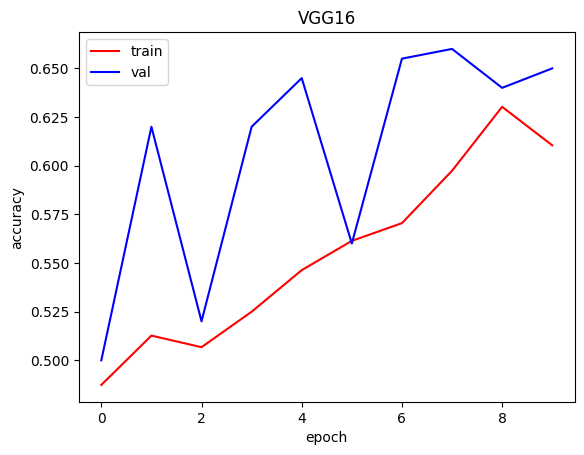

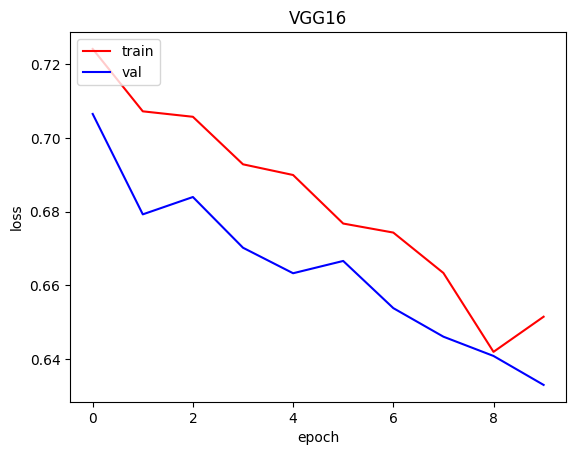

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('VGG16')
plt.figure()

**MobileNetV2**

<Figure size 640x480 with 0 Axes>

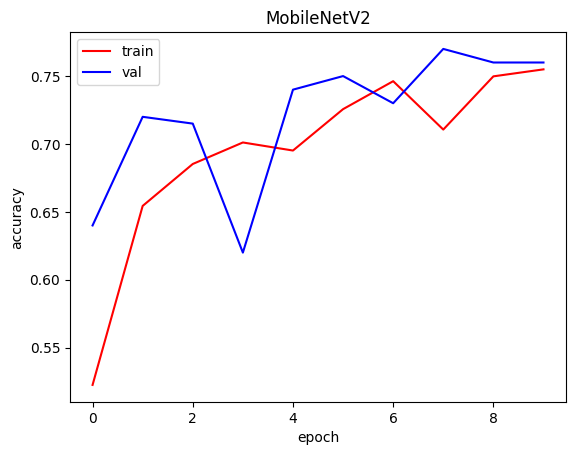

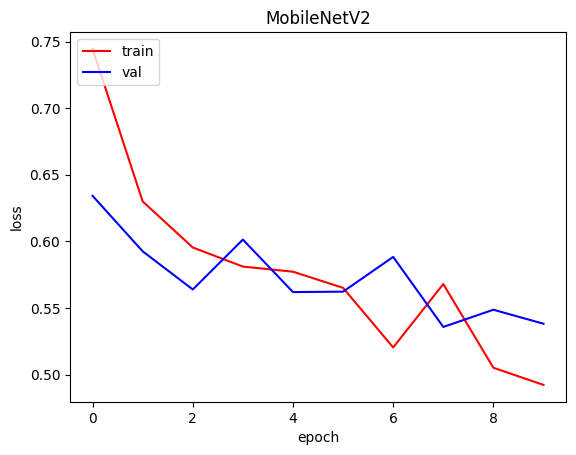

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('MobileNetV2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('MobileNetV2')
plt.figure()


**Xception**

<Figure size 640x480 with 0 Axes>

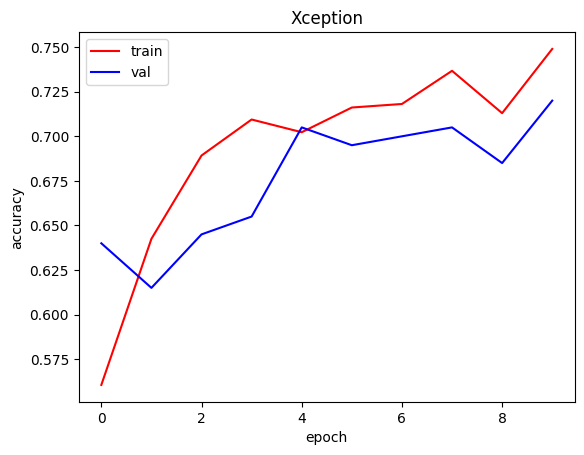

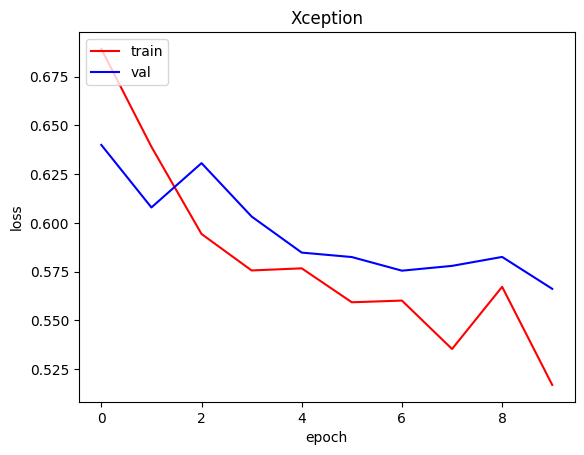

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Xception')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception')
plt.figure()


**ResNet50**

<Figure size 640x480 with 0 Axes>

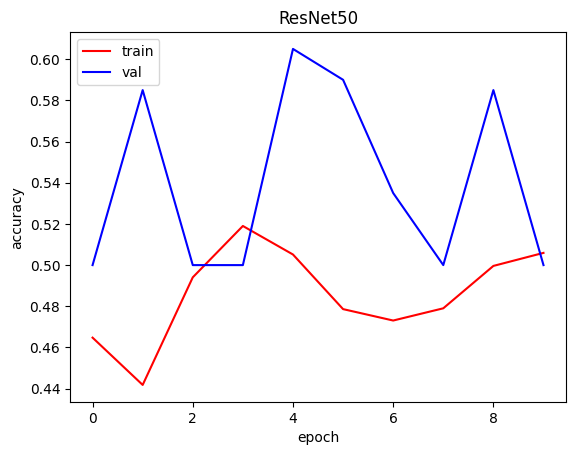

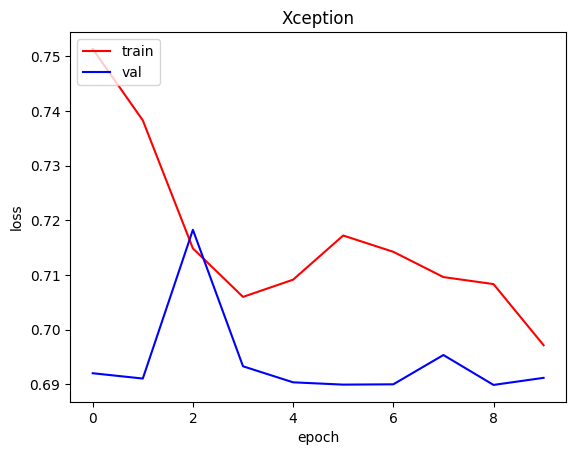

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception')
plt.figure()


**InceptionV3**

<Figure size 640x480 with 0 Axes>

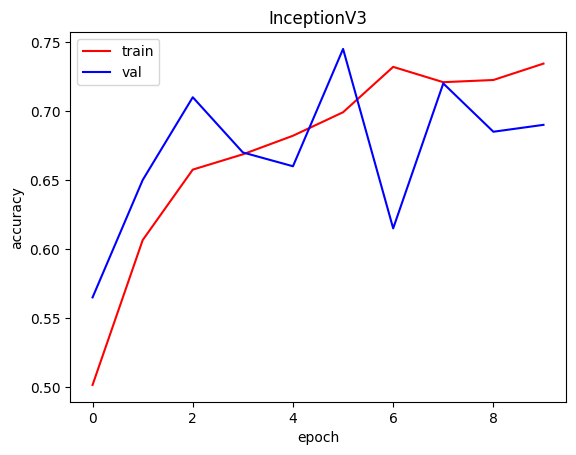

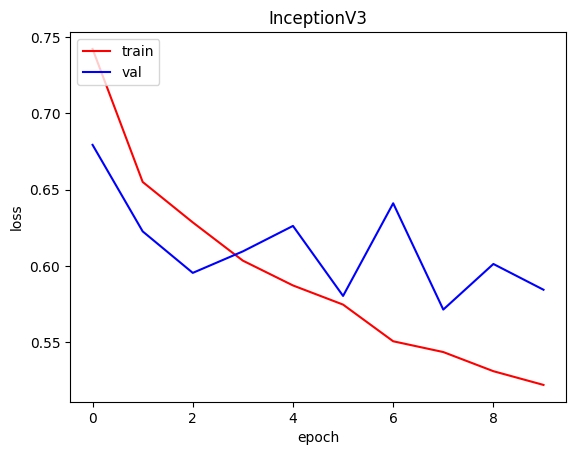

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('InceptionV3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('InceptionV3')
plt.figure()


**Fine-tuning**

**VGG16 after fine-tuning**

<Figure size 640x480 with 0 Axes>

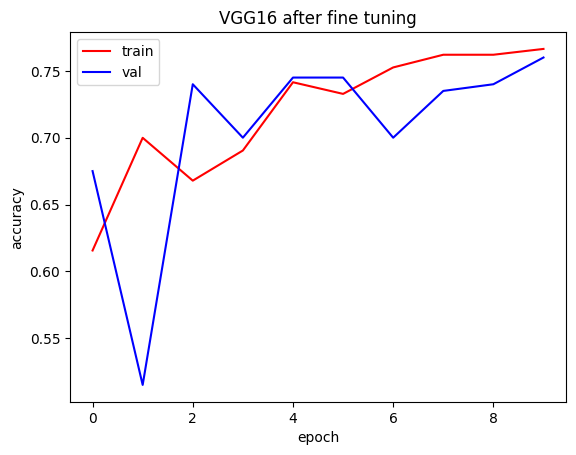

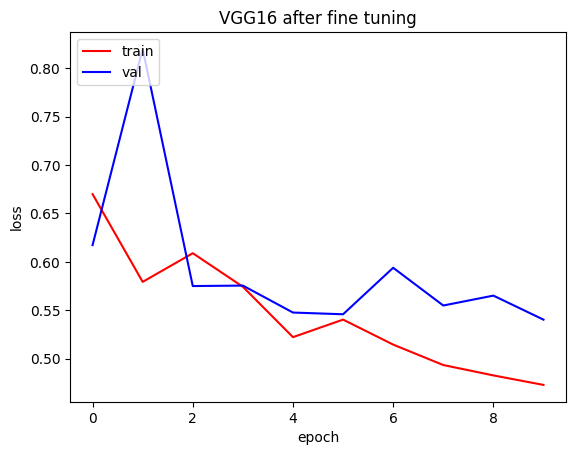

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history_fine1.history['accuracy']
val_acc = history_fine1.history['val_accuracy']
loss = history_fine1.history['loss']
val_loss = history_fine1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('VGG16 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('VGG16 after fine tuning')
plt.figure()

**MobileNetV2 after fine tuning**

<Figure size 640x480 with 0 Axes>

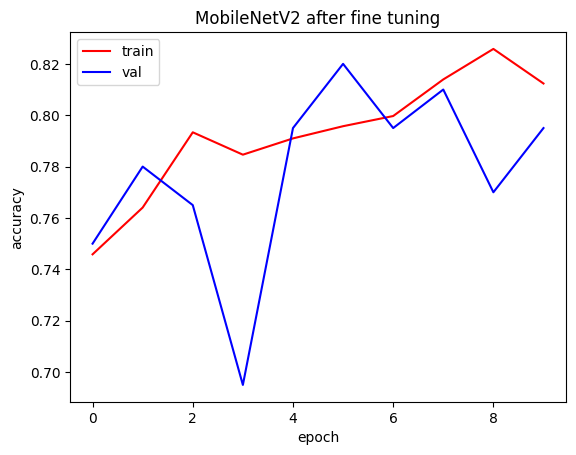

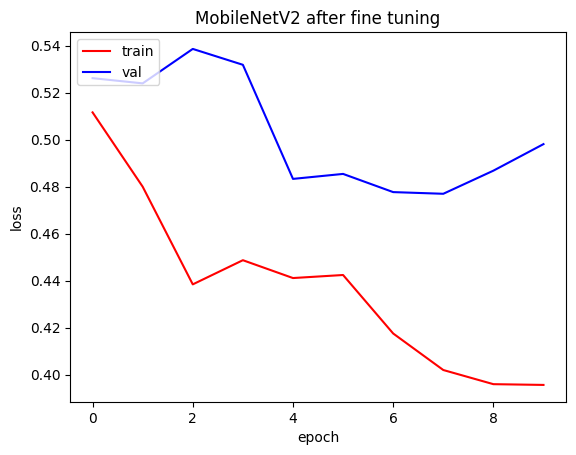

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history_fine2.history['accuracy']
val_acc = history_fine2.history['val_accuracy']
loss = history_fine2.history['loss']
val_loss = history_fine2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('MobileNetV2 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('MobileNetV2 after fine tuning')
plt.figure()

**Xception after fine tuning**

<Figure size 640x480 with 0 Axes>

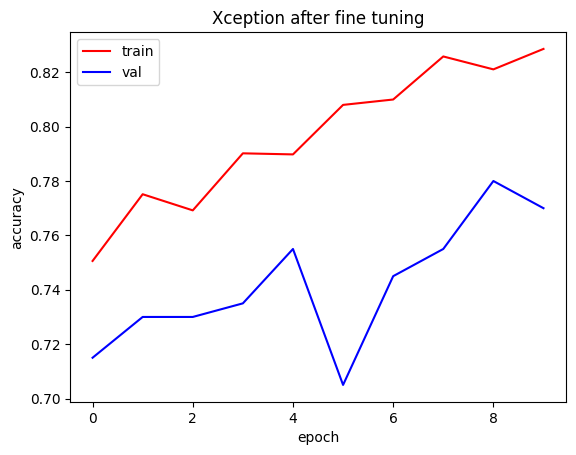

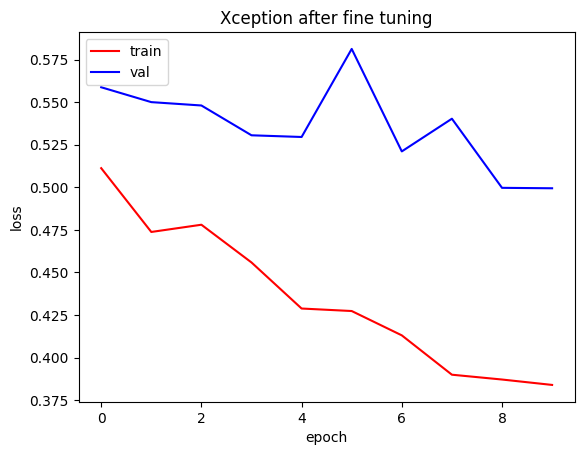

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history_fine3.history['accuracy']
val_acc = history_fine3.history['val_accuracy']
loss = history_fine3.history['loss']
val_loss = history_fine3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Xception after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception after fine tuning')
plt.figure()

**ResNet50 after fine tuning**

<Figure size 640x480 with 0 Axes>

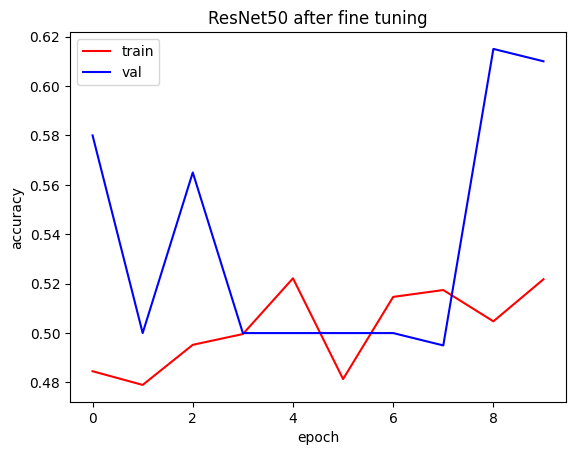

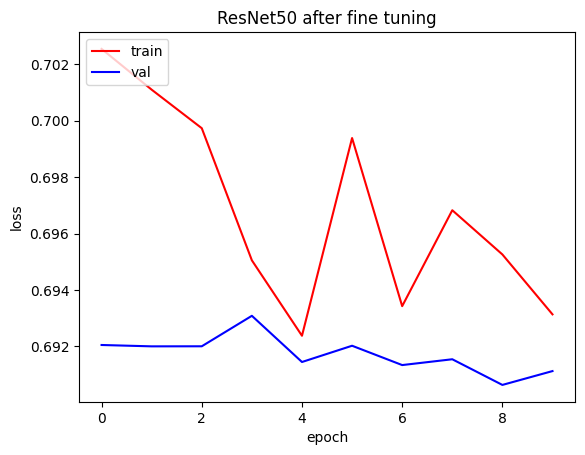

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history_fine4.history['accuracy']
val_acc = history_fine4.history['val_accuracy']
loss = history_fine4.history['loss']
val_loss = history_fine4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('ResNet50 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('ResNet50 after fine tuning')
plt.figure()

**InceptionV3 after fine tuning**

<Figure size 640x480 with 0 Axes>

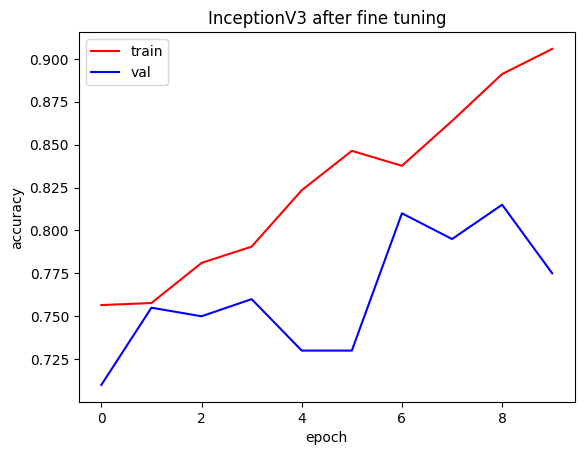

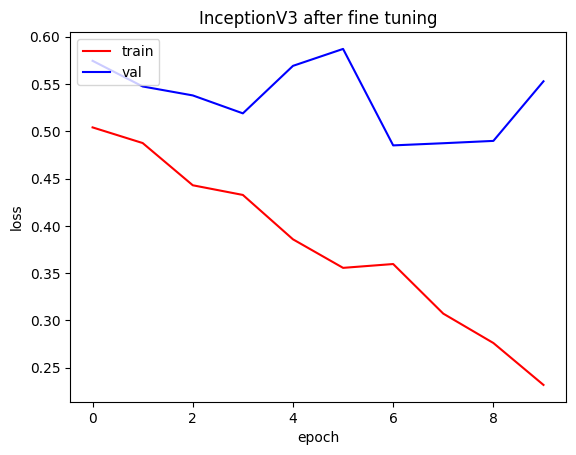

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history_fine5.history['accuracy']
val_acc = history_fine5.history['val_accuracy']
loss = history_fine5.history['loss']
val_loss = history_fine5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('InceptionV3 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('InceptionV3 after fine tuning')
plt.figure()

**Fusion Model**

<Figure size 640x480 with 0 Axes>

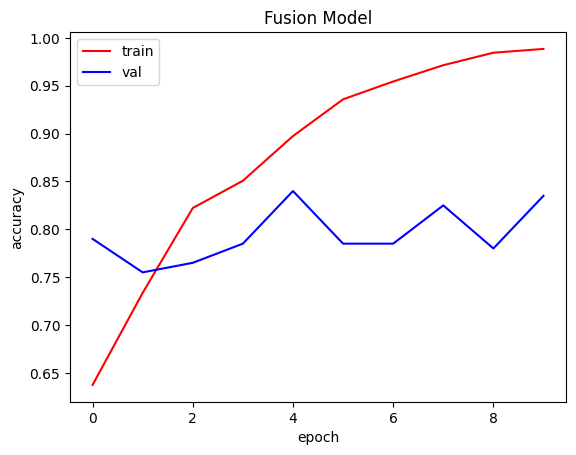

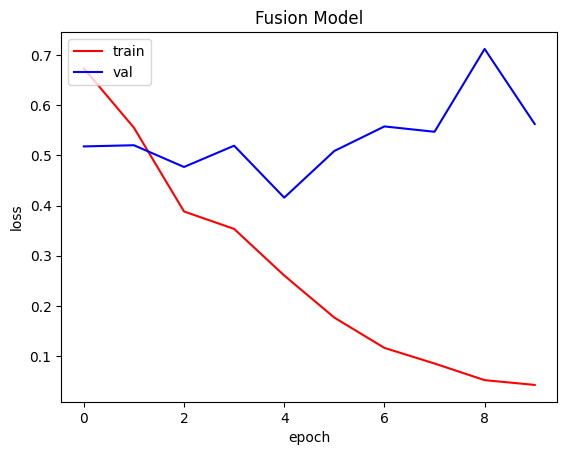

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Fusion Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Fusion Model')
plt.figure()


coba predict gambar menggunakan model accuracy tertinggi yaitu **fusion model/merged dan fine-tuned MobileNetV2**

# **Inference**

In [ ]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

In [ ]:
def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

In [ ]:
def autistic_not_autistic(image_path):
    preds = make_predictions(image_path)
    print(preds)
    if preds <= 0.5:
        print("Autistic")
    else:
        print("Not Autistic")

1/1 [==============================] - 0s 33ms/step
[[0.3628827]]
Autistic


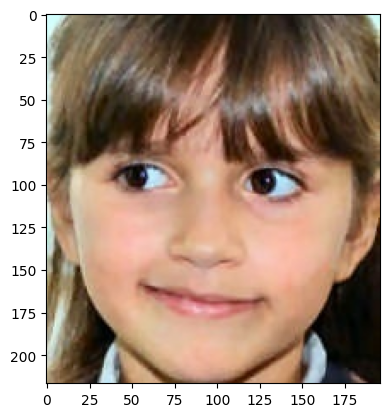

In [ ]:
autistic_not_autistic('/content/dataset/test/autistic/001.jpg')

1/1 [==============================] - 0s 33ms/step
[[0.7703565]]
Not Autistic


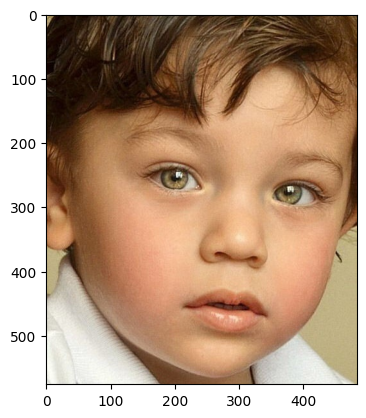

In [ ]:
autistic_not_autistic('/content/dataset/test/non_autistic/013.jpg')

1/1 [==============================] - 0s 34ms/step
[[0.41173932]]
Autistic


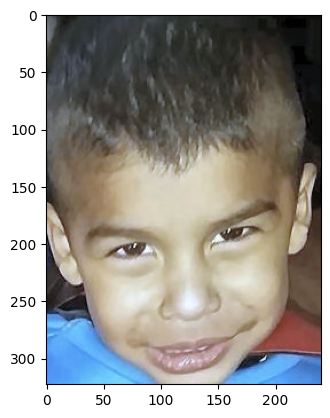

In [ ]:
autistic_not_autistic('/content/dataset/test/autistic/099.jpg')

In [ ]:
def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = merged.predict(image)
    return preds

1/1 [==============================] - 5s 5s/step
[[1.1630188e-17]]
Autistic


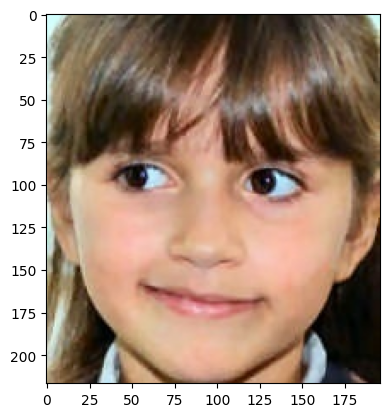

In [ ]:
autistic_not_autistic('/content/dataset/test/autistic/001.jpg')

1/1 [==============================] - 0s 53ms/step
[[0.]]
Autistic


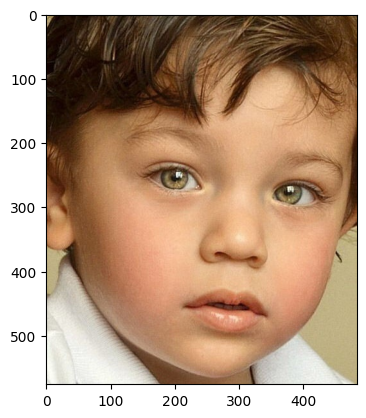

In [ ]:
autistic_not_autistic('/content/dataset/test/non_autistic/013.jpg')

1/1 [==============================] - 0s 209ms/step
[[0.]]
Autistic


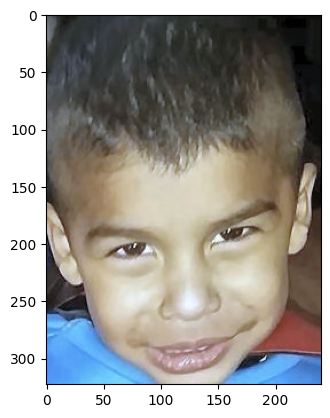

In [ ]:
autistic_not_autistic('/content/dataset/test/autistic/099.jpg')

**Meskipun akurasi fusion model tertinggi, namun saat ditest mengeluarkan hasil yang tidak memuaskan/salah, dibandingkan dengan model2(fine-tuned MobileNetV2)**